In [ ]:
<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.
https://www.wandb.com/articles/fundamentals-of-neural-networks
### Input Layer: This should be your relevant features you want to train on to make predictions. Your features will each have a neuron.

### Hidden Layer: Are the layers between the input and output layers not seen by the external system but gives further indication to your output layer what you are trying to predict. For instance if you are predicting a dog and there are pictures of cats that look very similar. Some hidden layers to may add are tail that are less bendable. Ears that fold over the canal larger sizes. Mouth structure.

### Output Layer: The amount of predictions you want to make. For classification it will be binary for an example covid or no covid. Or for regression this can be one target/output layer. For an example, with housing you want to predict the price based on sqft and or bathrooms. 

### Neuron: Is the building block of a neural network. You multiply the weight by the input and the bias is then added to the weighted input. The sum is passed through an activation function to display an output in a predictable form.

### Weight: Can be seen as your coefficient, different features weight more towards your output layer. 

### Activation Function: An example activation function we use so far was sigmoid which compresses the output between 0,1 to scale output to make them more comparable. 
### Node Map: Your visual display of the neural netwrok giving representation of your input, hidden, and outputs layers to make a prediction. 

### Perceptron: Is a type of linear regression. It processes input layers and adjust input weights as instructed by trainer.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### A neural network must begin with features that can be generalized to make prediction on called inputs. The input layers are seen but they can also produce inaccurate outputs. We can use neurons to gauge better predictions from a model. Weights can be understood as the coeffiecients that are multiplied to the input layers and then added to a bias to avoid overfitting. These are neurons that can be tweaked. Depending on your model you may use different metrics to determine where bias needs to be added to determine whether your model is making useful predictions. The layers then go through an activation function which is known to scale you layers and put them in a predictable form for your output layer. 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [4]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [7]:
# correct output
y = df['y']
# activation fucntion
def sigmoid(x):
  return 1 / (1 +np.exp(-x))

def sigmoid_derivate(x):
  sx = sigmoid(x)
  return sx * (1-sx)

print(y)

0    1
1    1
2    1
3    0
Name: y, dtype: int32


In [11]:
X = df.iloc[0:5, [0, 2]].values
X

array([[0, 1],
       [1, 1],
       [0, 1],
       [1, 0]])

In [33]:
weight = 2 * np.random.random((2,1)) -1
weight

array([[-0.09927179],
       [ 0.12193042]])

In [34]:
# sum of inputs
weighted_sum = np.dot(X, weight)
weighted_sum

array([[ 0.12193042],
       [ 0.02265864],
       [ 0.12193042],
       [-0.09927179]])

In [35]:
# compress weighted inputs for to normalize outputs
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.5304449 ],
       [0.50566442],
       [0.5304449 ],
       [0.47520242]])

In [41]:
# error is obtained of guessed value by actual values
y = [[1],[1],[1],[0]]
error = y - activated_output
error

array([[ 0.4695551 ],
       [ 0.49433558],
       [ 0.4695551 ],
       [-0.47520242]])

In [42]:
adjustments = error * sigmoid_derivate(weighted_sum)
adjustments

array([[ 0.11695355],
       [ 0.12356803],
       [ 0.11695355],
       [-0.11850839]])

In [45]:
weight += np.dot(X.T, adjustments)
weight

array([[-0.09421214],
       [ 0.47940555]])

In [46]:
# Steps we've already done: 
# 1. Randomly Initialized Weights already. Those are in memory as `weights`
# 2. We've already got input data & correct_outputs


# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(X, weight)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = y - activated_output
    
    adjustments = error * sigmoid_derivate(weighted_sum)
    
    # Update the Weights
    weight += np.dot(X.T, adjustments)
    
print("Weights after training")
print(weight)

print("Output after training")
print(activated_output)

Weights after training
[[-4.36778946]
 [ 8.9422103 ]]
Output after training
[[0.99986925]
 [0.98979247]
 [0.99986925]
 [0.01252113]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [47]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

# Preprocess and train test split

In [120]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

feats

X = diabetes[feats]
X
target = 'Outcome'
y2 = diabetes[target]
y2

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [102]:
scaler = MinMaxScaler()
print(scaler.fit(X))
X_scaled = scaler.transform(X)
print(X_scaled)
print(len(X_scaled))
print(len(y))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]
768
768


In [49]:
diabetes.shape

(768, 9)

In [78]:
y = np.array(y)
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [146]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, rate=0.01, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def sigmoid(self, x):
        return 1 / (1 +np.exp(-x))

    def sigmoid_derivate(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights # add in some ones for bias
        mweights = 2 * np.random.random((8)) -1
        # Number of misclassifications
        self.error = []  # Number of misclassifications
        for i in range(self.niter):
            errors = 0
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X_scaled, mweights)
            # Activate!
            activated_output = sigmoid(weighted_sum)
            # Cac error
            errors = y - activated_output
            adjustments = errors * sigmoid_derivate(weighted_sum)
            self.error.append(errors)
            # Update the Weights
            mweights += np.dot(X_scaled.T, adjustments)
            
    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return activated_output

array([ 0.44398757, -0.47147272,  0.51312959, -0.41926996,  0.6719279 ,
       -0.47928729,  0.53461509, -0.55852536,  0.53252467,  0.39429598,
       -0.44680096,  0.50387645, -0.54057215,  0.59908433,  0.48446811,
        0.46739951,  0.61423823,  0.50833775, -0.48498011,  0.56698482,
       -0.38282025, -0.5523409 ,  0.50963243,  0.47854463,  0.4271788 ,
        0.44602376,  0.47669612, -0.39431108, -0.630494  , -0.48018046,
       -0.58252873,  0.61343757, -0.44025154, -0.47561227, -0.57560808,
       -0.43651749, -0.52091036,  0.43605224,  0.55020656,  0.51568641,
       -0.44268188, -0.46767138, -0.56786599,  0.5072434 , -0.53026867,
        0.66341461, -0.42838276, -0.4254137 ,  0.49417892, -0.54550925,
       -0.39655035, -0.43646888, -0.49091282,  0.46162348, -0.46794618,
       -0.44031589,  0.50964374, -0.3913412 , -0.37688475, -0.40508452,
       -0.49633748,  0.47433605, -0.49279723, -0.41335784,  0.46424785,
       -0.50493388,  0.56208445, -0.47908295, -0.43684264, -0.44

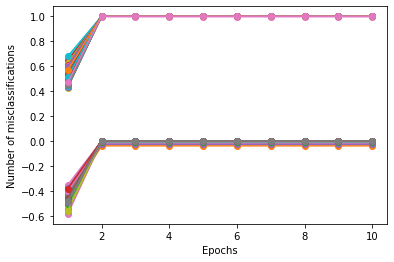

In [148]:
pn = Perceptron(0.1,10)
pn.fit(X_scaled,y)
plt.plot(range(1, len(pn.error) + 1), pn.error, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Multilayer perceptron practice

^C


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?